In [62]:
#!pip install --upgrade --force-reinstall pillow

In [79]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

In [85]:

data_dir = r'C:\Users\sulai\VIRTUAL INTERNSHIP\Data Folder\road signs classification'

train_path = r'C:\Users\sulai\VIRTUAL INTERNSHIP\Data Folder\road signs classification\Train'
test_path = r'C:\Users\sulai\VIRTUAL INTERNSHIP\Data Folder\road signs classification\Test'

IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [86]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [87]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }
6

6

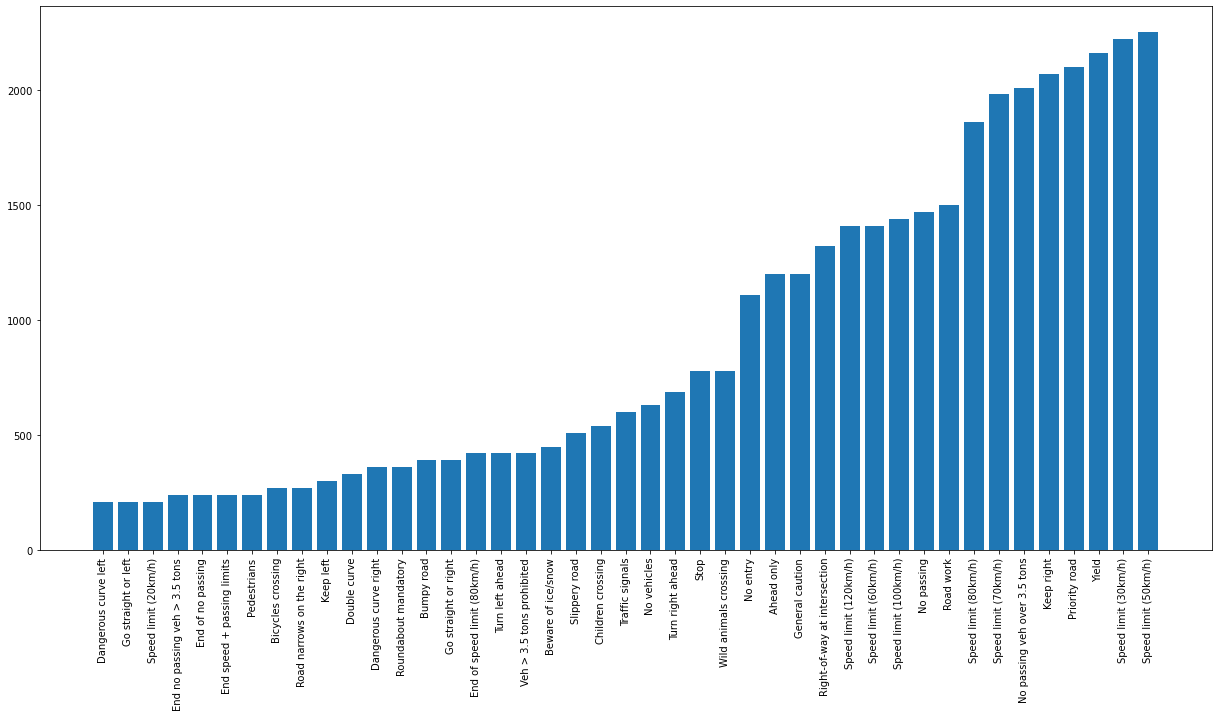

In [88]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

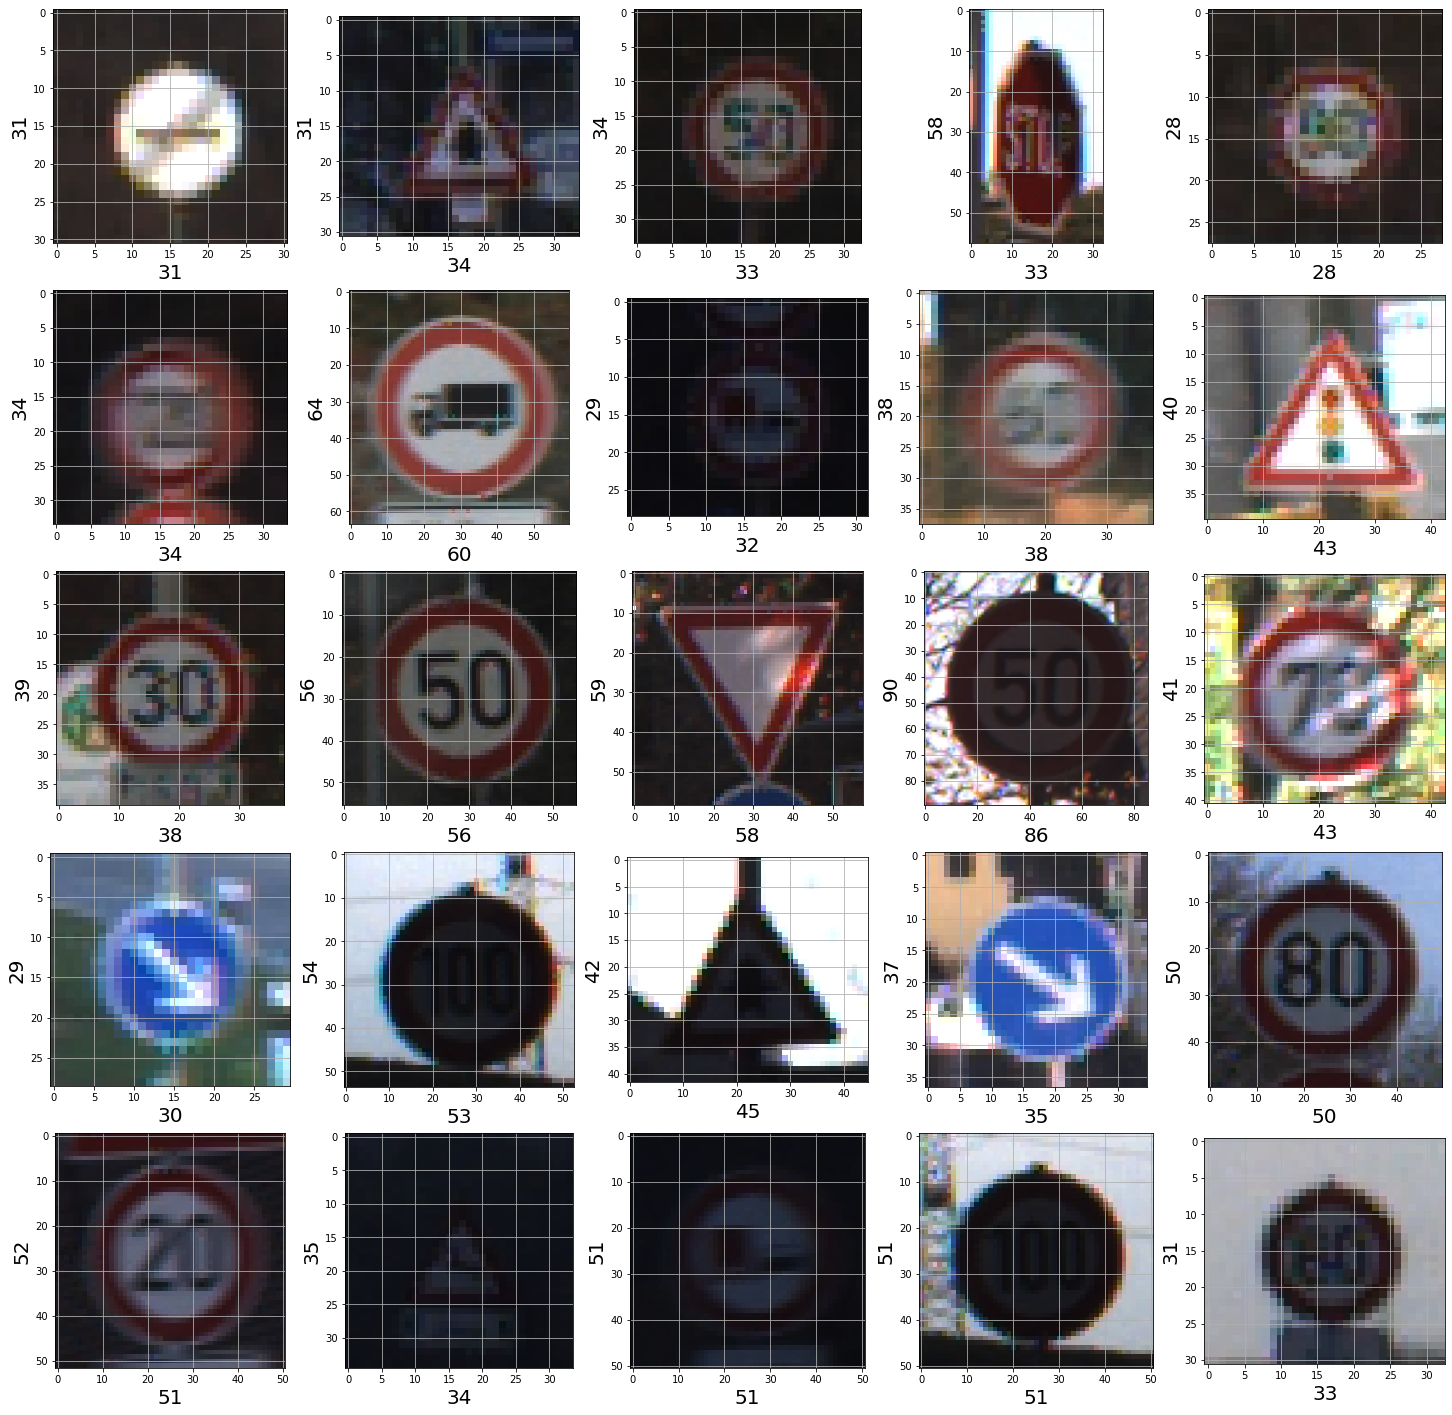

In [89]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [93]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + png)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

Error in 00000_00000_00000.png
Error in 00000_00000_00001.png
Error in 00000_00000_00002.png
Error in 00000_00000_00003.png
Error in 00000_00000_00004.png
Error in 00000_00000_00005.png
Error in 00000_00000_00006.png
Error in 00000_00000_00007.png
Error in 00000_00000_00008.png
Error in 00000_00000_00009.png
Error in 00000_00000_00010.png
Error in 00000_00000_00011.png
Error in 00000_00000_00012.png
Error in 00000_00000_00013.png
Error in 00000_00000_00014.png
Error in 00000_00000_00015.png
Error in 00000_00000_00016.png
Error in 00000_00000_00017.png
Error in 00000_00000_00018.png
Error in 00000_00000_00019.png
Error in 00000_00000_00020.png
Error in 00000_00000_00021.png
Error in 00000_00000_00022.png
Error in 00000_00000_00023.png
Error in 00000_00000_00024.png
Error in 00000_00000_00025.png
Error in 00000_00000_00026.png
Error in 00000_00000_00027.png
Error in 00000_00000_00028.png
Error in 00000_00000_00029.png
Error in 00000_00001_00000.png
Error in 00000_00001_00001.png
Error in

Error in 00001_00065_00028.png
Error in 00001_00065_00029.png
Error in 00001_00066_00000.png
Error in 00001_00066_00001.png
Error in 00001_00066_00002.png
Error in 00001_00066_00003.png
Error in 00001_00066_00004.png
Error in 00001_00066_00005.png
Error in 00001_00066_00006.png
Error in 00001_00066_00007.png
Error in 00001_00066_00008.png
Error in 00001_00066_00009.png
Error in 00001_00066_00010.png
Error in 00001_00066_00011.png
Error in 00001_00066_00012.png
Error in 00001_00066_00013.png
Error in 00001_00066_00014.png
Error in 00001_00066_00015.png
Error in 00001_00066_00016.png
Error in 00001_00066_00017.png
Error in 00001_00066_00018.png
Error in 00001_00066_00019.png
Error in 00001_00066_00020.png
Error in 00001_00066_00021.png
Error in 00001_00066_00022.png
Error in 00001_00066_00023.png
Error in 00001_00066_00024.png
Error in 00001_00066_00025.png
Error in 00001_00066_00026.png
Error in 00001_00066_00027.png
Error in 00001_00066_00028.png
Error in 00001_00066_00029.png
Error in

Error in 00002_00072_00015.png
Error in 00002_00072_00016.png
Error in 00002_00072_00017.png
Error in 00002_00072_00018.png
Error in 00002_00072_00019.png
Error in 00002_00072_00020.png
Error in 00002_00072_00021.png
Error in 00002_00072_00022.png
Error in 00002_00072_00023.png
Error in 00002_00072_00024.png
Error in 00002_00072_00025.png
Error in 00002_00072_00026.png
Error in 00002_00072_00027.png
Error in 00002_00072_00028.png
Error in 00002_00072_00029.png
Error in 00002_00073_00000.png
Error in 00002_00073_00001.png
Error in 00002_00073_00002.png
Error in 00002_00073_00003.png
Error in 00002_00073_00004.png
Error in 00002_00073_00005.png
Error in 00002_00073_00006.png
Error in 00002_00073_00007.png
Error in 00002_00073_00008.png
Error in 00002_00073_00009.png
Error in 00002_00073_00010.png
Error in 00002_00073_00011.png
Error in 00002_00073_00012.png
Error in 00002_00073_00013.png
Error in 00002_00073_00014.png
Error in 00002_00073_00015.png
Error in 00002_00073_00016.png
Error in

Error in 00004_00014_00003.png
Error in 00004_00014_00004.png
Error in 00004_00014_00005.png
Error in 00004_00014_00006.png
Error in 00004_00014_00007.png
Error in 00004_00014_00008.png
Error in 00004_00014_00009.png
Error in 00004_00014_00010.png
Error in 00004_00014_00011.png
Error in 00004_00014_00012.png
Error in 00004_00014_00013.png
Error in 00004_00014_00014.png
Error in 00004_00014_00015.png
Error in 00004_00014_00016.png
Error in 00004_00014_00017.png
Error in 00004_00014_00018.png
Error in 00004_00014_00019.png
Error in 00004_00014_00020.png
Error in 00004_00014_00021.png
Error in 00004_00014_00022.png
Error in 00004_00014_00023.png
Error in 00004_00014_00024.png
Error in 00004_00014_00025.png
Error in 00004_00014_00026.png
Error in 00004_00014_00027.png
Error in 00004_00014_00028.png
Error in 00004_00014_00029.png
Error in 00004_00015_00000.png
Error in 00004_00015_00001.png
Error in 00004_00015_00002.png
Error in 00004_00015_00003.png
Error in 00004_00015_00004.png
Error in

Error in 00005_00025_00029.png
Error in 00005_00026_00000.png
Error in 00005_00026_00001.png
Error in 00005_00026_00002.png
Error in 00005_00026_00003.png
Error in 00005_00026_00004.png
Error in 00005_00026_00005.png
Error in 00005_00026_00006.png
Error in 00005_00026_00007.png
Error in 00005_00026_00008.png
Error in 00005_00026_00009.png
Error in 00005_00026_00010.png
Error in 00005_00026_00011.png
Error in 00005_00026_00012.png
Error in 00005_00026_00013.png
Error in 00005_00026_00014.png
Error in 00005_00026_00015.png
Error in 00005_00026_00016.png
Error in 00005_00026_00017.png
Error in 00005_00026_00018.png
Error in 00005_00026_00019.png
Error in 00005_00026_00020.png
Error in 00005_00026_00021.png
Error in 00005_00026_00022.png
Error in 00005_00026_00023.png
Error in 00005_00026_00024.png
Error in 00005_00026_00025.png
Error in 00005_00026_00026.png
Error in 00005_00026_00027.png
Error in 00005_00026_00028.png
Error in 00005_00026_00029.png
Error in 00005_00027_00000.png
Error in

Error in 00007_00023_00023.png
Error in 00007_00023_00024.png
Error in 00007_00023_00025.png
Error in 00007_00023_00026.png
Error in 00007_00023_00027.png
Error in 00007_00023_00028.png
Error in 00007_00023_00029.png
Error in 00007_00024_00000.png
Error in 00007_00024_00001.png
Error in 00007_00024_00002.png
Error in 00007_00024_00003.png
Error in 00007_00024_00004.png
Error in 00007_00024_00005.png
Error in 00007_00024_00006.png
Error in 00007_00024_00007.png
Error in 00007_00024_00008.png
Error in 00007_00024_00009.png
Error in 00007_00024_00010.png
Error in 00007_00024_00011.png
Error in 00007_00024_00012.png
Error in 00007_00024_00013.png
Error in 00007_00024_00014.png
Error in 00007_00024_00015.png
Error in 00007_00024_00016.png
Error in 00007_00024_00017.png
Error in 00007_00024_00018.png
Error in 00007_00024_00019.png
Error in 00007_00024_00020.png
Error in 00007_00024_00021.png
Error in 00007_00024_00022.png
Error in 00007_00024_00023.png
Error in 00007_00024_00024.png
Error in

Error in 00009_00000_00000.png
Error in 00009_00000_00001.png
Error in 00009_00000_00002.png
Error in 00009_00000_00003.png
Error in 00009_00000_00004.png
Error in 00009_00000_00005.png
Error in 00009_00000_00006.png
Error in 00009_00000_00007.png
Error in 00009_00000_00008.png
Error in 00009_00000_00009.png
Error in 00009_00000_00010.png
Error in 00009_00000_00011.png
Error in 00009_00000_00012.png
Error in 00009_00000_00013.png
Error in 00009_00000_00014.png
Error in 00009_00000_00015.png
Error in 00009_00000_00016.png
Error in 00009_00000_00017.png
Error in 00009_00000_00018.png
Error in 00009_00000_00019.png
Error in 00009_00000_00020.png
Error in 00009_00000_00021.png
Error in 00009_00000_00022.png
Error in 00009_00000_00023.png
Error in 00009_00000_00024.png
Error in 00009_00000_00025.png
Error in 00009_00000_00026.png
Error in 00009_00000_00027.png
Error in 00009_00000_00028.png
Error in 00009_00000_00029.png
Error in 00009_00001_00000.png
Error in 00009_00001_00001.png
Error in

Error in 00010_00030_00013.png
Error in 00010_00030_00014.png
Error in 00010_00030_00015.png
Error in 00010_00030_00016.png
Error in 00010_00030_00017.png
Error in 00010_00030_00018.png
Error in 00010_00030_00019.png
Error in 00010_00030_00020.png
Error in 00010_00030_00021.png
Error in 00010_00030_00022.png
Error in 00010_00030_00023.png
Error in 00010_00030_00024.png
Error in 00010_00030_00025.png
Error in 00010_00030_00026.png
Error in 00010_00030_00027.png
Error in 00010_00030_00028.png
Error in 00010_00030_00029.png
Error in 00010_00031_00000.png
Error in 00010_00031_00001.png
Error in 00010_00031_00002.png
Error in 00010_00031_00003.png
Error in 00010_00031_00004.png
Error in 00010_00031_00005.png
Error in 00010_00031_00006.png
Error in 00010_00031_00007.png
Error in 00010_00031_00008.png
Error in 00010_00031_00009.png
Error in 00010_00031_00010.png
Error in 00010_00031_00011.png
Error in 00010_00031_00012.png
Error in 00010_00031_00013.png
Error in 00010_00031_00014.png
Error in

Error in 00011_00043_00023.png
Error in 00011_00043_00024.png
Error in 00011_00043_00025.png
Error in 00011_00043_00026.png
Error in 00011_00043_00027.png
Error in 00011_00043_00028.png
Error in 00011_00043_00029.png
Error in 00012_00000_00000.png
Error in 00012_00000_00001.png
Error in 00012_00000_00002.png
Error in 00012_00000_00003.png
Error in 00012_00000_00004.png
Error in 00012_00000_00005.png
Error in 00012_00000_00006.png
Error in 00012_00000_00007.png
Error in 00012_00000_00008.png
Error in 00012_00000_00009.png
Error in 00012_00000_00010.png
Error in 00012_00000_00011.png
Error in 00012_00000_00012.png
Error in 00012_00000_00013.png
Error in 00012_00000_00014.png
Error in 00012_00000_00015.png
Error in 00012_00000_00016.png
Error in 00012_00000_00017.png
Error in 00012_00000_00018.png
Error in 00012_00000_00019.png
Error in 00012_00000_00020.png
Error in 00012_00000_00021.png
Error in 00012_00000_00022.png
Error in 00012_00000_00023.png
Error in 00012_00000_00024.png
Error in

Error in 00012_00048_00023.png
Error in 00012_00048_00024.png
Error in 00012_00048_00025.png
Error in 00012_00048_00026.png
Error in 00012_00048_00027.png
Error in 00012_00048_00028.png
Error in 00012_00048_00029.png
Error in 00012_00049_00000.png
Error in 00012_00049_00001.png
Error in 00012_00049_00002.png
Error in 00012_00049_00003.png
Error in 00012_00049_00004.png
Error in 00012_00049_00005.png
Error in 00012_00049_00006.png
Error in 00012_00049_00007.png
Error in 00012_00049_00008.png
Error in 00012_00049_00009.png
Error in 00012_00049_00010.png
Error in 00012_00049_00011.png
Error in 00012_00049_00012.png
Error in 00012_00049_00013.png
Error in 00012_00049_00014.png
Error in 00012_00049_00015.png
Error in 00012_00049_00016.png
Error in 00012_00049_00017.png
Error in 00012_00049_00018.png
Error in 00012_00049_00019.png
Error in 00012_00049_00020.png
Error in 00012_00049_00021.png
Error in 00012_00049_00022.png
Error in 00012_00049_00023.png
Error in 00012_00049_00024.png
Error in

Error in 00013_00052_00025.png
Error in 00013_00052_00026.png
Error in 00013_00052_00027.png
Error in 00013_00052_00028.png
Error in 00013_00052_00029.png
Error in 00013_00053_00000.png
Error in 00013_00053_00001.png
Error in 00013_00053_00002.png
Error in 00013_00053_00003.png
Error in 00013_00053_00004.png
Error in 00013_00053_00005.png
Error in 00013_00053_00006.png
Error in 00013_00053_00007.png
Error in 00013_00053_00008.png
Error in 00013_00053_00009.png
Error in 00013_00053_00010.png
Error in 00013_00053_00011.png
Error in 00013_00053_00012.png
Error in 00013_00053_00013.png
Error in 00013_00053_00014.png
Error in 00013_00053_00015.png
Error in 00013_00053_00016.png
Error in 00013_00053_00017.png
Error in 00013_00053_00018.png
Error in 00013_00053_00019.png
Error in 00013_00053_00020.png
Error in 00013_00053_00021.png
Error in 00013_00053_00022.png
Error in 00013_00053_00023.png
Error in 00013_00053_00024.png
Error in 00013_00053_00025.png
Error in 00013_00053_00026.png
Error in

Error in 00016_00013_00002.png
Error in 00016_00013_00003.png
Error in 00016_00013_00004.png
Error in 00016_00013_00005.png
Error in 00016_00013_00006.png
Error in 00016_00013_00007.png
Error in 00016_00013_00008.png
Error in 00016_00013_00009.png
Error in 00016_00013_00010.png
Error in 00016_00013_00011.png
Error in 00016_00013_00012.png
Error in 00016_00013_00013.png
Error in 00016_00013_00014.png
Error in 00016_00013_00015.png
Error in 00016_00013_00016.png
Error in 00016_00013_00017.png
Error in 00016_00013_00018.png
Error in 00016_00013_00019.png
Error in 00016_00013_00020.png
Error in 00016_00013_00021.png
Error in 00016_00013_00022.png
Error in 00016_00013_00023.png
Error in 00016_00013_00024.png
Error in 00016_00013_00025.png
Error in 00016_00013_00026.png
Error in 00016_00013_00027.png
Error in 00016_00013_00028.png
Error in 00016_00013_00029.png
Error in 00017_00000_00000.png
Error in 00017_00000_00001.png
Error in 00017_00000_00002.png
Error in 00017_00000_00003.png
Error in

Error in 00019_00006_00000.png
Error in 00019_00006_00001.png
Error in 00019_00006_00002.png
Error in 00019_00006_00003.png
Error in 00019_00006_00004.png
Error in 00019_00006_00005.png
Error in 00019_00006_00006.png
Error in 00019_00006_00007.png
Error in 00019_00006_00008.png
Error in 00019_00006_00009.png
Error in 00019_00006_00010.png
Error in 00019_00006_00011.png
Error in 00019_00006_00012.png
Error in 00019_00006_00013.png
Error in 00019_00006_00014.png
Error in 00019_00006_00015.png
Error in 00019_00006_00016.png
Error in 00019_00006_00017.png
Error in 00019_00006_00018.png
Error in 00019_00006_00019.png
Error in 00019_00006_00020.png
Error in 00019_00006_00021.png
Error in 00019_00006_00022.png
Error in 00019_00006_00023.png
Error in 00019_00006_00024.png
Error in 00019_00006_00025.png
Error in 00019_00006_00026.png
Error in 00019_00006_00027.png
Error in 00019_00006_00028.png
Error in 00019_00006_00029.png
Error in 00020_00000_00000.png
Error in 00020_00000_00001.png
Error in

Error in 00024_00005_00027.png
Error in 00024_00005_00028.png
Error in 00024_00005_00029.png
Error in 00024_00006_00000.png
Error in 00024_00006_00001.png
Error in 00024_00006_00002.png
Error in 00024_00006_00003.png
Error in 00024_00006_00004.png
Error in 00024_00006_00005.png
Error in 00024_00006_00006.png
Error in 00024_00006_00007.png
Error in 00024_00006_00008.png
Error in 00024_00006_00009.png
Error in 00024_00006_00010.png
Error in 00024_00006_00011.png
Error in 00024_00006_00012.png
Error in 00024_00006_00013.png
Error in 00024_00006_00014.png
Error in 00024_00006_00015.png
Error in 00024_00006_00016.png
Error in 00024_00006_00017.png
Error in 00024_00006_00018.png
Error in 00024_00006_00019.png
Error in 00024_00006_00020.png
Error in 00024_00006_00021.png
Error in 00024_00006_00022.png
Error in 00024_00006_00023.png
Error in 00024_00006_00024.png
Error in 00024_00006_00025.png
Error in 00024_00006_00026.png
Error in 00024_00006_00027.png
Error in 00024_00006_00028.png
Error in

Error in 00026_00010_00016.png
Error in 00026_00010_00017.png
Error in 00026_00010_00018.png
Error in 00026_00010_00019.png
Error in 00026_00010_00020.png
Error in 00026_00010_00021.png
Error in 00026_00010_00022.png
Error in 00026_00010_00023.png
Error in 00026_00010_00024.png
Error in 00026_00010_00025.png
Error in 00026_00010_00026.png
Error in 00026_00010_00027.png
Error in 00026_00010_00028.png
Error in 00026_00010_00029.png
Error in 00026_00011_00000.png
Error in 00026_00011_00001.png
Error in 00026_00011_00002.png
Error in 00026_00011_00003.png
Error in 00026_00011_00004.png
Error in 00026_00011_00005.png
Error in 00026_00011_00006.png
Error in 00026_00011_00007.png
Error in 00026_00011_00008.png
Error in 00026_00011_00009.png
Error in 00026_00011_00010.png
Error in 00026_00011_00011.png
Error in 00026_00011_00012.png
Error in 00026_00011_00013.png
Error in 00026_00011_00014.png
Error in 00026_00011_00015.png
Error in 00026_00011_00016.png
Error in 00026_00011_00017.png
Error in

Error in 00031_00009_00019.png
Error in 00031_00009_00020.png
Error in 00031_00009_00021.png
Error in 00031_00009_00022.png
Error in 00031_00009_00023.png
Error in 00031_00009_00024.png
Error in 00031_00009_00025.png
Error in 00031_00009_00026.png
Error in 00031_00009_00027.png
Error in 00031_00009_00028.png
Error in 00031_00009_00029.png
Error in 00031_00010_00000.png
Error in 00031_00010_00001.png
Error in 00031_00010_00002.png
Error in 00031_00010_00003.png
Error in 00031_00010_00004.png
Error in 00031_00010_00005.png
Error in 00031_00010_00006.png
Error in 00031_00010_00007.png
Error in 00031_00010_00008.png
Error in 00031_00010_00009.png
Error in 00031_00010_00010.png
Error in 00031_00010_00011.png
Error in 00031_00010_00012.png
Error in 00031_00010_00013.png
Error in 00031_00010_00014.png
Error in 00031_00010_00015.png
Error in 00031_00010_00016.png
Error in 00031_00010_00017.png
Error in 00031_00010_00018.png
Error in 00031_00010_00019.png
Error in 00031_00010_00020.png
Error in

Error in 00035_00012_00013.png
Error in 00035_00012_00014.png
Error in 00035_00012_00015.png
Error in 00035_00012_00016.png
Error in 00035_00012_00017.png
Error in 00035_00012_00018.png
Error in 00035_00012_00019.png
Error in 00035_00012_00020.png
Error in 00035_00012_00021.png
Error in 00035_00012_00022.png
Error in 00035_00012_00023.png
Error in 00035_00012_00024.png
Error in 00035_00012_00025.png
Error in 00035_00012_00026.png
Error in 00035_00012_00027.png
Error in 00035_00012_00028.png
Error in 00035_00012_00029.png
Error in 00035_00013_00000.png
Error in 00035_00013_00001.png
Error in 00035_00013_00002.png
Error in 00035_00013_00003.png
Error in 00035_00013_00004.png
Error in 00035_00013_00005.png
Error in 00035_00013_00006.png
Error in 00035_00013_00007.png
Error in 00035_00013_00008.png
Error in 00035_00013_00009.png
Error in 00035_00013_00010.png
Error in 00035_00013_00011.png
Error in 00035_00013_00012.png
Error in 00035_00013_00013.png
Error in 00035_00013_00014.png
Error in

Error in 00038_00040_00025.png
Error in 00038_00040_00026.png
Error in 00038_00040_00027.png
Error in 00038_00040_00028.png
Error in 00038_00040_00029.png
Error in 00038_00041_00000.png
Error in 00038_00041_00001.png
Error in 00038_00041_00002.png
Error in 00038_00041_00003.png
Error in 00038_00041_00004.png
Error in 00038_00041_00005.png
Error in 00038_00041_00006.png
Error in 00038_00041_00007.png
Error in 00038_00041_00008.png
Error in 00038_00041_00009.png
Error in 00038_00041_00010.png
Error in 00038_00041_00011.png
Error in 00038_00041_00012.png
Error in 00038_00041_00013.png
Error in 00038_00041_00014.png
Error in 00038_00041_00015.png
Error in 00038_00041_00016.png
Error in 00038_00041_00017.png
Error in 00038_00041_00018.png
Error in 00038_00041_00019.png
Error in 00038_00041_00020.png
Error in 00038_00041_00021.png
Error in 00038_00041_00022.png
Error in 00038_00041_00023.png
Error in 00038_00041_00024.png
Error in 00038_00041_00025.png
Error in 00038_00041_00026.png
Error in

Error in 00042_00002_00029.png
Error in 00042_00003_00000.png
Error in 00042_00003_00001.png
Error in 00042_00003_00002.png
Error in 00042_00003_00003.png
Error in 00042_00003_00004.png
Error in 00042_00003_00005.png
Error in 00042_00003_00006.png
Error in 00042_00003_00007.png
Error in 00042_00003_00008.png
Error in 00042_00003_00009.png
Error in 00042_00003_00010.png
Error in 00042_00003_00011.png
Error in 00042_00003_00012.png
Error in 00042_00003_00013.png
Error in 00042_00003_00014.png
Error in 00042_00003_00015.png
Error in 00042_00003_00016.png
Error in 00042_00003_00017.png
Error in 00042_00003_00018.png
Error in 00042_00003_00019.png
Error in 00042_00003_00020.png
Error in 00042_00003_00021.png
Error in 00042_00003_00022.png
Error in 00042_00003_00023.png
Error in 00042_00003_00024.png
Error in 00042_00003_00025.png
Error in 00042_00003_00026.png
Error in 00042_00003_00027.png
Error in 00042_00003_00028.png
Error in 00042_00003_00029.png
Error in 00042_00004_00000.png
Error in

In [77]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]